In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [140]:
a = cv2.imread("brain_tumor_dataset/yes/Y1.jpg")
a.shape

(218, 180, 3)

In [141]:
path = "brain_tumor_dataset"
inputs = []
target_list = []
for subpath in os.listdir(path):
    if subpath == 'yes':
        target = 1
        for file in os.listdir(path + '/' + subpath):
            curr_pic = cv2.imread(path + '/' + subpath + '/' + file)
            inputs.append(curr_pic)
            target_list.append(target)
            
    else:
        target = 0
        for file in os.listdir(path + '/' + subpath):
            curr_pic = cv2.imread(path + '/' + subpath + '/' + file)
            inputs.append(curr_pic)
            target_list.append(target)

inputs_array = np.array(inputs)
targets_array = np.array(target_list)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [142]:
inputs_array.shape

(253,)

In [143]:
targets_array.shape

(253,)

In [144]:
inputs_array[0].shape

(630, 630, 3)

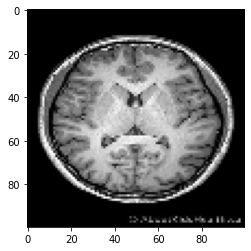

In [145]:
plt.imshow(x_train[0])

# Data processing

In [146]:
### normalize
normalized_data = inputs_array/255

In [147]:
### resize
new_size = (100,100)
resized_nor_inputs = []
for image in normalized_data:
    resized_image = cv2.resize(image, new_size)
    resized_nor_inputs.append(resized_image)
    
resized_nor_inputs = np.array(resized_nor_inputs)

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(resized_nor_inputs, targets_array, test_size = 0.2, random_state = 42, shuffle = 1)

In [150]:
x_train[100].shape

(100, 100, 3)

In [151]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 78, 124], dtype=int64))

In [152]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([20, 31], dtype=int64))

# Model

In [153]:
import tensorflow as tf

In [154]:
inputs_shape = resized_image.shape
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = inputs_shape))
model_1.add(tf.keras.layers.MaxPooling2D(2,2))
model_1.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model_1.add(tf.keras.layers.MaxPooling2D(2,2))
model_1.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(60, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [155]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 60)              

In [156]:
model_1.compile(
                optimizer = 'adam',
                loss= tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"]
                )
history = model_1.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/50
202/202 [==============================] - 2s 9ms/sample - loss: 0.6782 - accuracy: 0.6733 - val_loss: 0.5387 - val_accuracy: 0.8039
Epoch 2/50
202/202 [==============================] - 1s 6ms/sample - loss: 0.5458 - accuracy: 0.7673 - val_loss: 0.3815 - val_accuracy: 0.8627
Epoch 3/50
202/202 [==============================] - 1s 6ms/sample - loss: 0.4809 - accuracy: 0.7822 - val_loss: 0.3887 - val_accuracy: 0.8431
Epoch 4/50
202/202 [==============================] - 1s 6ms/sample - loss: 0.4681 - accuracy: 0.7624 - val_loss: 0.3611 - val_accuracy: 0.8431
Epoch 5/50
202/202 [==============================] - 1s 6ms/sample - loss: 0.4044 - accuracy: 0.8267 - val_loss: 0.2964 - val_accuracy: 0.9216
Epoch 6/50
202/202 [==============================] - 1s 6ms/sample - loss: 0.3214 - accuracy: 0.8465 - val_loss: 0.2968 - val_accuracy: 0.9020
Epoch 7/50
202/202 [==============================] - 1s 6ms/sample - loss: 0.2837 - accura

Text(0, 0.5, 'validation_loss')

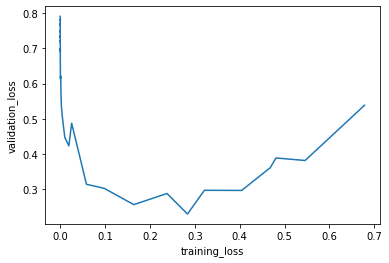

In [162]:
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(training_loss, validation_loss)
plt.xlabel("training_loss")
plt.ylabel("validation_loss")

Text(0, 0.5, 'validation_accuracy')

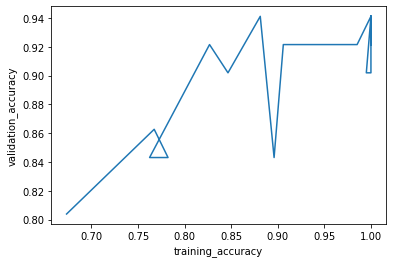

In [164]:
training_loss = history.history["accuracy"]
validation_loss = history.history["val_accuracy"]
plt.plot(training_loss, validation_loss)
plt.xlabel("training_accuracy")
plt.ylabel("validation_accuracy")

In [165]:
inputs_shape = resized_image.shape
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = inputs_shape))
model_2.add(tf.keras.layers.MaxPooling2D(2,2))
model_2.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model_2.add(tf.keras.layers.MaxPooling2D(2,2))
model_2.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(60, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [166]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 60)              

In [172]:
model_2.compile(
                optimizer = 'adam',
                loss= tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"]
                )
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
history_2 = model_2.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), callbacks=[callback])

Train on 202 samples, validate on 51 samples
Epoch 1/50
202/202 [==============================] - 7s 33ms/sample - loss: 0.0268 - accuracy: 0.9851 - val_loss: 0.7958 - val_accuracy: 0.8431
Epoch 2/50
202/202 [==============================] - 5s 26ms/sample - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.8464 - val_accuracy: 0.9216
Epoch 3/50
202/202 [==============================] - 6s 27ms/sample - loss: 0.0057 - accuracy: 0.9950 - val_loss: 0.8186 - val_accuracy: 0.8431
Epoch 4/50
202/202 [==============================] - 5s 26ms/sample - loss: 0.0050 - accuracy: 0.9950 - val_loss: 0.7873 - val_accuracy: 0.8627
Epoch 5/50
202/202 [==============================] - 5s 27ms/sample - loss: 8.4097e-04 - accuracy: 1.0000 - val_loss: 0.7115 - val_accuracy: 0.8431
Epoch 6/50
202/202 [==============================] - 6s 27ms/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7239 - val_accuracy: 0.9020
Epoch 7/50
202/202 [==============================] - 5s 26ms/sample - loss: 8.52

Text(0, 0.5, 'validation_loss')

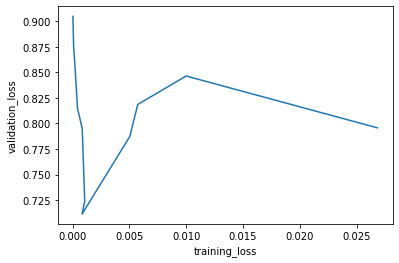

In [173]:
training_loss = history_2.history["loss"]
validation_loss = history_2.history["val_loss"]
plt.plot(training_loss, validation_loss)
plt.xlabel("training_loss")
plt.ylabel("validation_loss")

Text(0, 0.5, 'validation_accuracy')

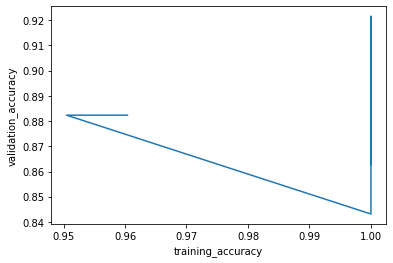

In [174]:
training_loss = history.history["accuracy"]
validation_loss = history.history["val_accuracy"]
plt.plot(training_loss, validation_loss)
plt.xlabel("training_accuracy")
plt.ylabel("validation_accuracy")